***
# 2. Seaborn

The official web page: https://seaborn.pydata.org/

***

## 1. Matplotlib
## 2. Seaborn - statistical graphs
## 3. Plotly and Cufflinks - interactive graphs
## 4. Pandas - built-in data visualization
## 5. Some Tips to Make Better Looking Charts (Optional)


***
## Table of Contents
### 1. Introduction to Seaborn

### 2. Distribution Plots
### 3. Categorical Data Plots
### 4. Matrix Plots
- Allow to plot data as color-encoded matrices and can also be used to indicate clusters within the data.

    1) Heatmap
    
    2) Clustermap

### 5. Grids
- Grids are general types of plots that allow to map plot types to rows and columns of a grid. This helps to create similar plots separated by features

### 6. Regression Plots
- Seaborn has many built-in capabilities for regression plots and we will only cover the **lmplot()** function here

### 7. Style and Color


***
### Documentation

- https://seaborn.pydata.org/

- https://github.com/mwaskom/seaborn

***


## 1. Introduction to Seaborn

#### Seaborn is a statistical plotting library
- It has beautiful defauly styles
- It is well designed to work with **Pandas** dataframes

#### The basic steps to creating plots with Seaborn are:
 1. Prepare some data
 2. Control figure aesthetics
 3. Plot with Seaborn
 4. Further customize your plot

In [1]:
import seaborn as sbn
import matplotlib.pyplot as plt
%matplotlib inline

####  Built-in Data Set
Seaborn comes with built-in data set 'tips'.

In [2]:
tips = sbn.load_dataset('tips')

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
tips.shape

(244, 7)

In [5]:
# Create a function to provide data exploratory summary
def df_summary(df,head_size = 5, show_info = True):
    '''print df summary statistics to screen'''
    display(df.shape)
    display(df.head(head_size))
    if show_info:
        display(df.info())
df_summary(tips)

(244, 7)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


None

***
## 2. Distribution Plots

Three common plots to visualize the distribution of a data set:

* 1) displot
* 2) jointplot
* 3) pairplot

### 1) distplot

The distplot shows the distribution of a univariate set of observations.

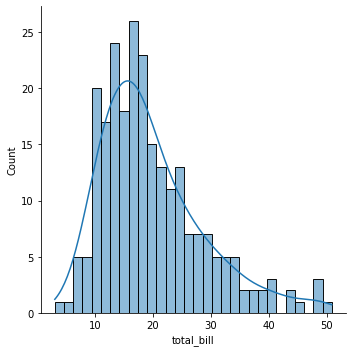

In [6]:
sbn.displot(tips['total_bill'], kde=True, bins=30) 
# kde = kernel density estimation: sum(all the normal distributions) 
# kde = False --> histogram

To remove the kde layer and just have the histogram use:

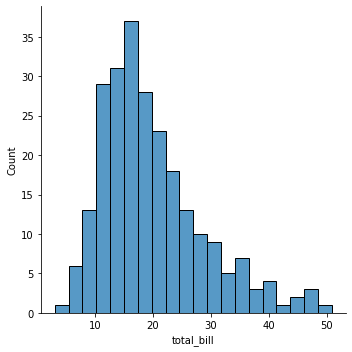

In [7]:
sbn.displot(tips['total_bill'],kde=False,bins=20)

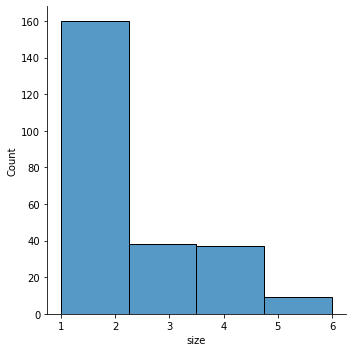

In [8]:
# Exercise: Use distplot() to visualize the tip column with and without kde
sbn.displot(tips['size'], kde=False, bins=4) 

### 2) jointplot

jointplot() allows you to basically match up two data fields, with your preference of what **kind** of parameter to compare with: 
* “scatter” 
* “reg” 
* “kde” 
* “hex”

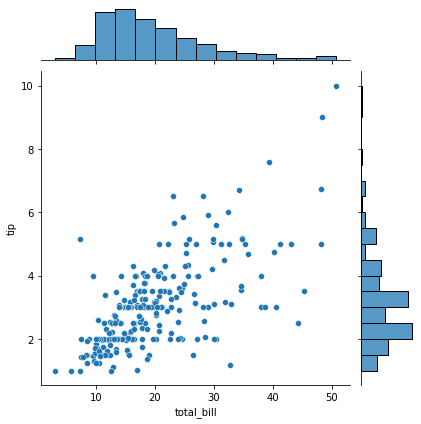

In [9]:
sbn.jointplot(x='total_bill',y='tip',data=tips,kind='scatter')  #hex, reg, kde, scatter

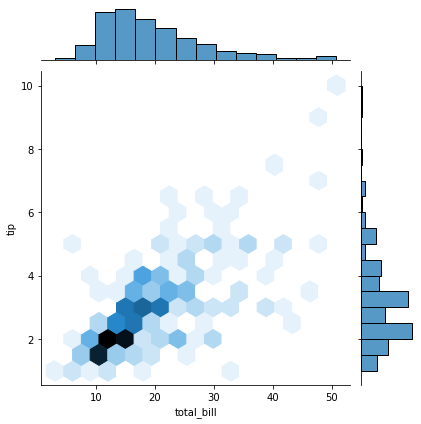

In [10]:
sbn.jointplot(x='total_bill',y='tip',data=tips,kind='hex')

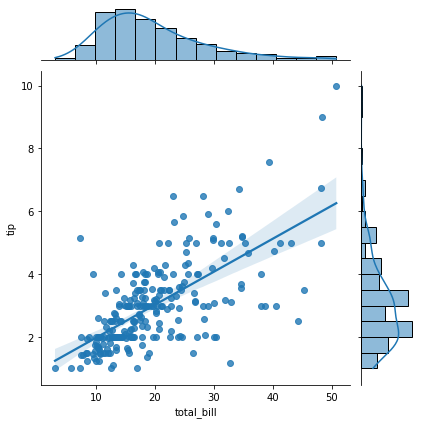

In [11]:
sbn.jointplot(x='total_bill',y='tip',data=tips,kind='reg')

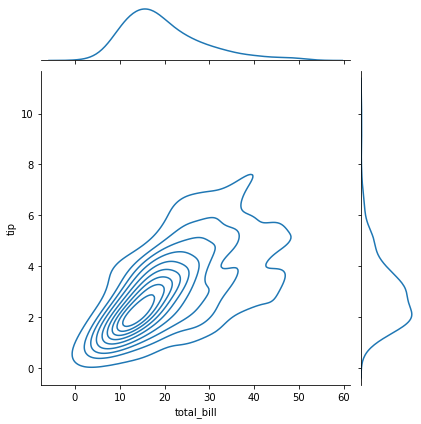

In [12]:
sbn.jointplot(x='total_bill',y='tip',data=tips,kind='kde')

### 3) pairplot

pairplot will plot pairwise relationships across an entire dataframe (for the numerical columns) and supports a color hue argument (for categorical columns). 

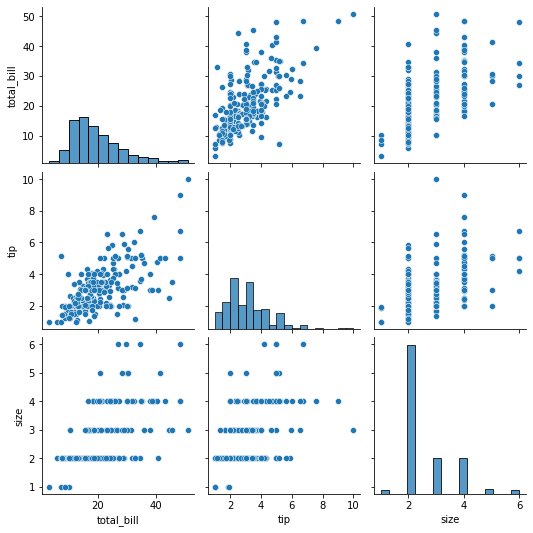

In [13]:
sbn.pairplot(tips) # a collection of joinplots for every single numerical columns

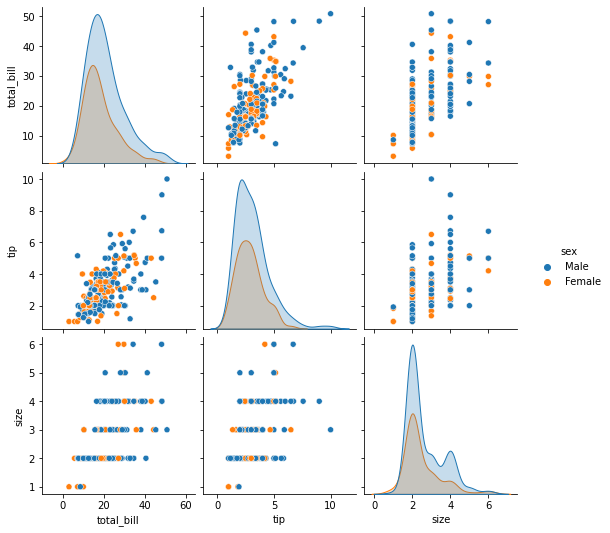

In [15]:
sbn.pairplot(tips, hue='sex') # a collection of joinplots for every single numerical columns

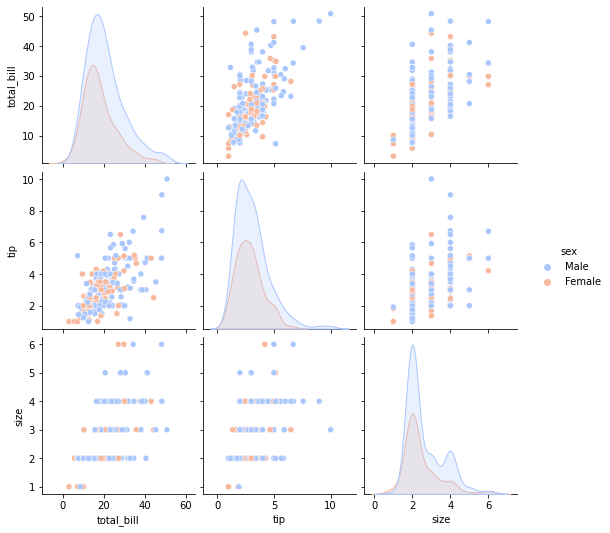

In [16]:
sbn.pairplot(tips, hue='sex', palette='coolwarm')

In [17]:
# Exercise: Use column smoker (use hue) and day to create jointplot and pairplot



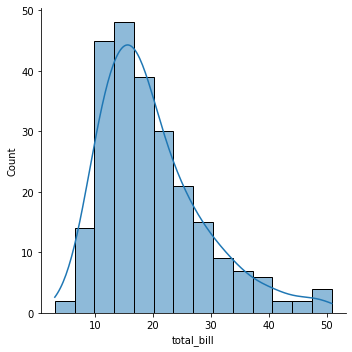

In [18]:
sbn.displot(tips['total_bill'], kde=True)  # Kernel density estimation

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

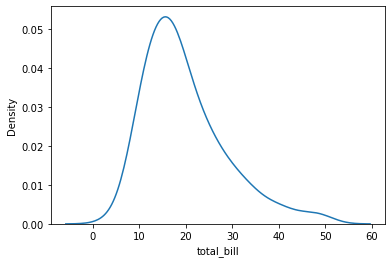

In [19]:
sbn.kdeplot(tips['total_bill'])

***
## 3. Categorical Data Plots

Let's use seaborn to plot categorical data and introduce a few main plot types:

* 1) barplot
* 2) countplot
* 3) boxplot
* 4) catplot

### 1) barplot

**barplot** is a general plot that allows you to aggregate the categorical feature/data based off some function, `by default is the mean`:

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

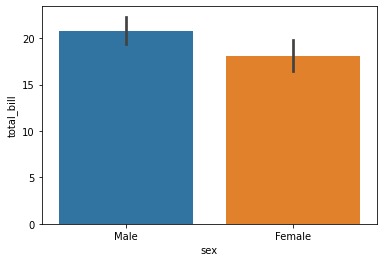

In [20]:
sbn.barplot(x='sex',y='total_bill',data=tips) # visualization of pandas groupby

In [21]:
tips.groupby(['sex']).agg({'total_bill':'mean'})

,total_bill
sex,
Male,20.744076
Female,18.056897


In [22]:
import numpy as np

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

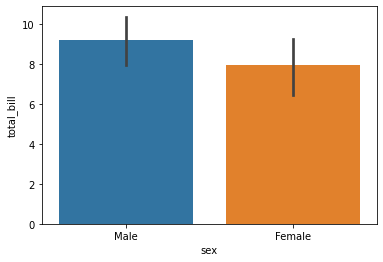

In [23]:
sbn.barplot(x='sex',y='total_bill',data=tips, estimator=np.std) # visualization of groupby

You can change the estimator object to your own function, that converts a vector to a scalar: (optional
    Statistical function to estimate within each categorical bin)

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

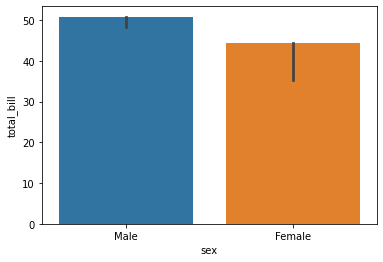

In [24]:
sbn.barplot(x='sex',y='total_bill',data=tips,estimator=np.max)

### 2) countplot

This is essentially the same as barplot except the estimator is explicitly counting the number of occurrences. Which is why we only pass the x value:

<AxesSubplot:xlabel='sex', ylabel='count'>

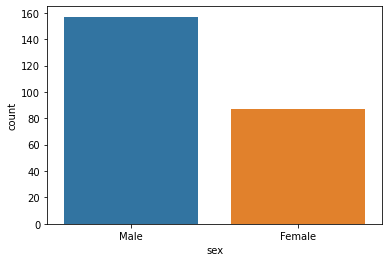

In [25]:
sbn.countplot(x='sex',data=tips)  # y-axes is number of counts

### 3) boxplot

boxplots are used to show the distribution of categorical data. A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

<AxesSubplot:xlabel='day', ylabel='total_bill'>

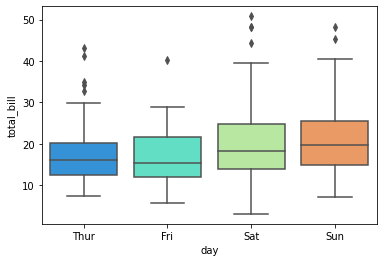

In [26]:
sbn.boxplot(x="day", y="total_bill", data=tips,palette='rainbow')  # coolwarm / rainbow

<AxesSubplot:xlabel='day', ylabel='total_bill'>

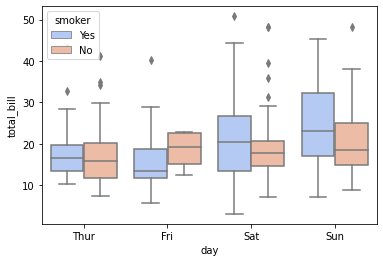

In [27]:
sbn.boxplot(x="day", y="total_bill", hue="smoker",data=tips, palette="coolwarm")

<AxesSubplot:xlabel='day', ylabel='total_bill'>

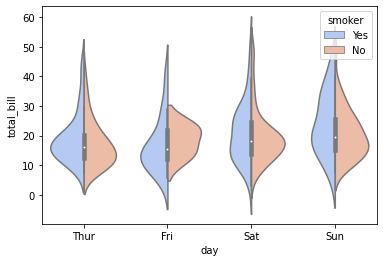

In [28]:
sbn.violinplot(x="day", y="total_bill", hue="smoker",data=tips, palette="coolwarm", split=True)  
# split=True
# actual distribution of points

<AxesSubplot:xlabel='day', ylabel='total_bill'>

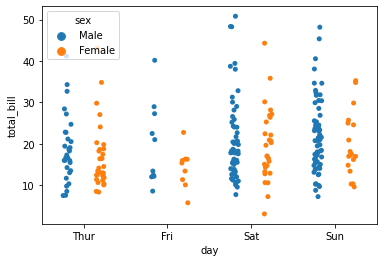

In [29]:
sbn.stripplot(x="day", y="total_bill", hue="sex",data=tips, jitter=True, dodge=True) # "dodge" replaces "split"
# scatter plot based off the category

### 4) catplot

catplot is the most general form of a categorical plot. It can take in a **kind** parameter to adjust the plot type:

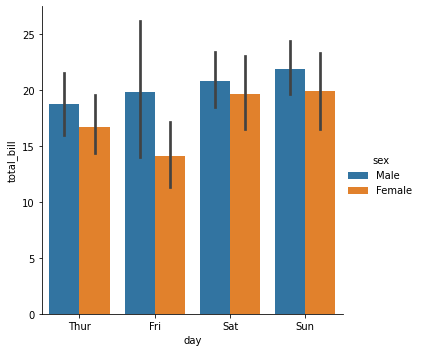

In [30]:
sbn.catplot(x='day',y='total_bill',data=tips,kind='bar', hue='sex')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


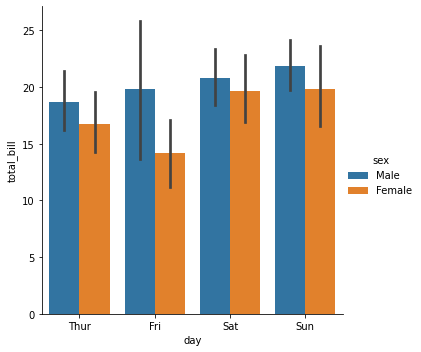

In [31]:
sbn.factorplot(x='day',y='total_bill',data=tips,kind='bar', hue='sex')  # kind = violin

***
## 4. Matrix Plots

Matrix plots allow you to plot data as color-encoded matrices and can also be used to indicate clusters within the data.

* 1) Heatmap
* 2) Clustermap

In [32]:
flights = sbn.load_dataset('flights')

In [33]:
df_summary(flights)

(144, 3)

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


None

### 1) Heatmap

In order for a heatmap to work properly, your data should already be in a **matrix form**, the sns.heatmap() function basically just colors it in for you. 

For example:

In [34]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [35]:
# Matrix form for correlation data
tips.corr()

C:\Users\yumei\AppData\Local\Temp/ipykernel_91376/3812684929.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  tips.corr()


,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


C:\Users\yumei\AppData\Local\Temp/ipykernel_91376/4211409444.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sbn.heatmap(tips.corr(), annot=True)


<AxesSubplot:>

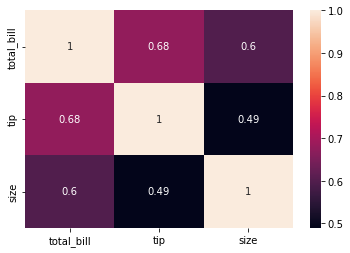

In [36]:
sbn.heatmap(tips.corr(), annot=True)

C:\Users\yumei\AppData\Local\Temp/ipykernel_91376/3056147509.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sbn.heatmap(tips.corr(),annot=True, cmap='coolwarm')


<AxesSubplot:>

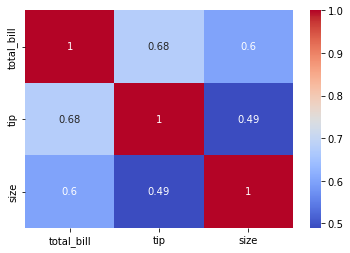

In [37]:
sbn.heatmap(tips.corr(),annot=True, cmap='coolwarm')

In [38]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [39]:
flights.pivot_table(values='passengers',index='month',columns='year')

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


<AxesSubplot:xlabel='year', ylabel='month'>

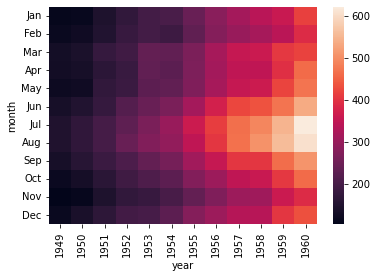

In [40]:
pvflights = flights.pivot_table(values='passengers',index='month',columns='year')
sbn.heatmap(pvflights)

<AxesSubplot:xlabel='year', ylabel='month'>

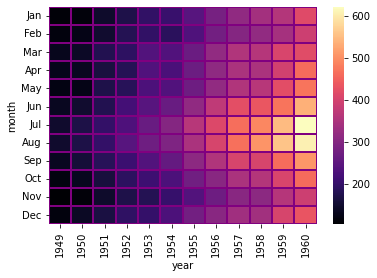

In [41]:
sbn.heatmap(pvflights,cmap='magma',linecolor='purple', linewidths=0.4)

<AxesSubplot:xlabel='year', ylabel='month'>

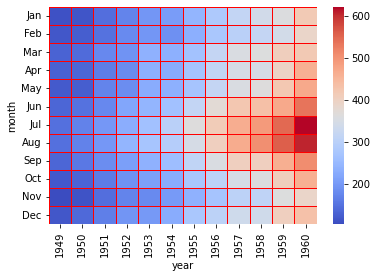

In [42]:
sbn.heatmap(pvflights,cmap='coolwarm',linecolor='red',linewidths=1)

### 2) Clustermap

The clustermap uses hierarchal clustering to produce a clustered version of the heatmap. For example:

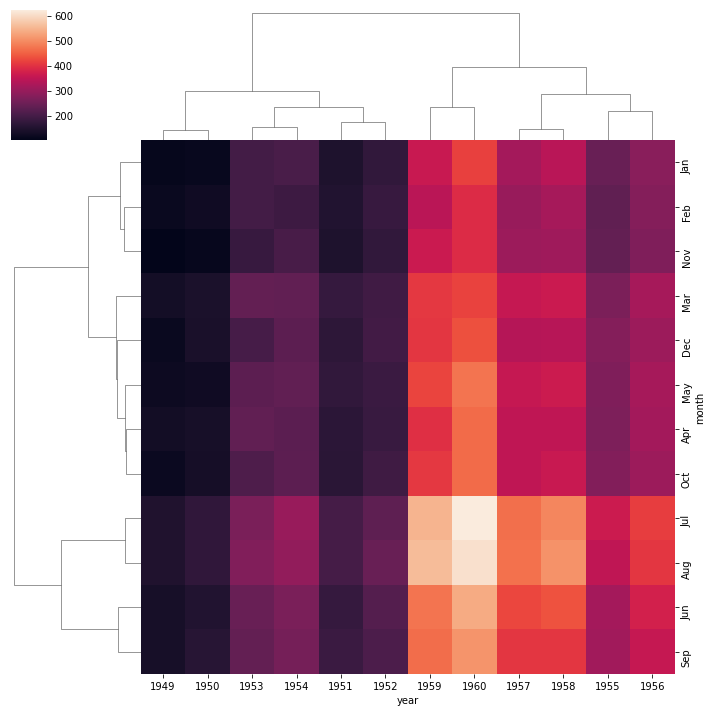

In [43]:
sbn.clustermap(pvflights)

Notice now how the years and months are no longer in order, instead they are grouped by similarity in value (passenger count). That means we can begin to infer things from this plot, such as August and July being similar (makes sense, since they are both summer travel months)

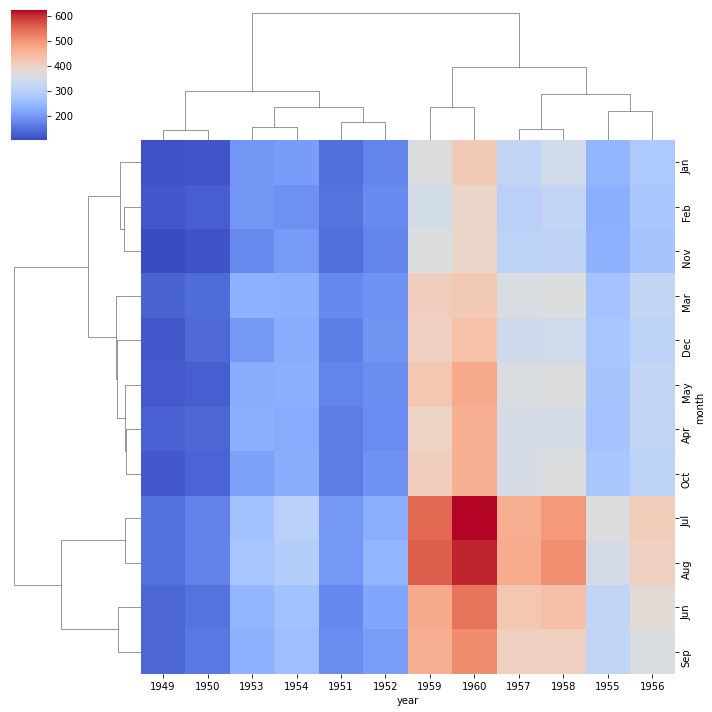

In [44]:
# More options to get the information a little clearer like normalization
sbn.clustermap(pvflights,cmap='coolwarm')

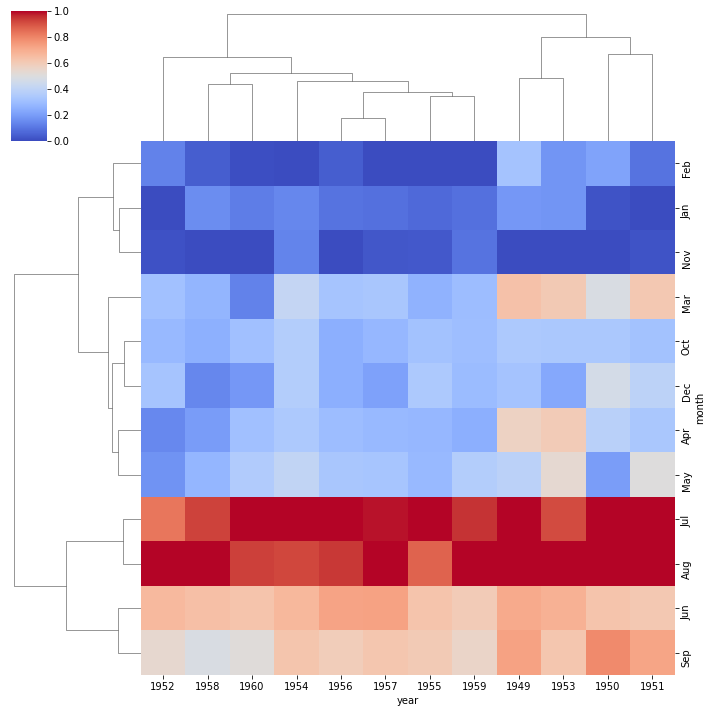

In [45]:
# More options to get the information a little clearer like normalization
sbn.clustermap(pvflights,cmap='coolwarm',standard_scale=1)   # More in ML cluster analysis

***
## 5. Grids

Grids are general types of plots that allow you to map plot types to rows and columns of a grid. This helps you create similar plots separated by features.

In [46]:
iris = sbn.load_dataset('iris')

In [47]:
df_summary(iris)

(150, 5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


None

In [48]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [49]:
set(iris['species'])

{'setosa', 'versicolor', 'virginica'}

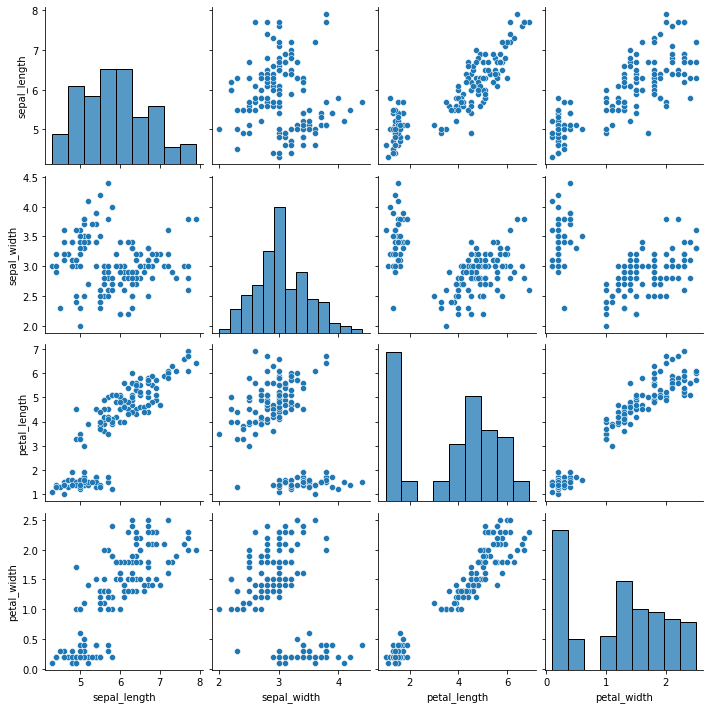

In [50]:
sbn.pairplot(iris)  # automated join plots for all the numeric data fields/ variables in the entire dataset 

### 1) PairGrid

Pairgrid is a subplot grid for plotting pairwise relationships in a dataset. IT has a little more controls than pairplot.

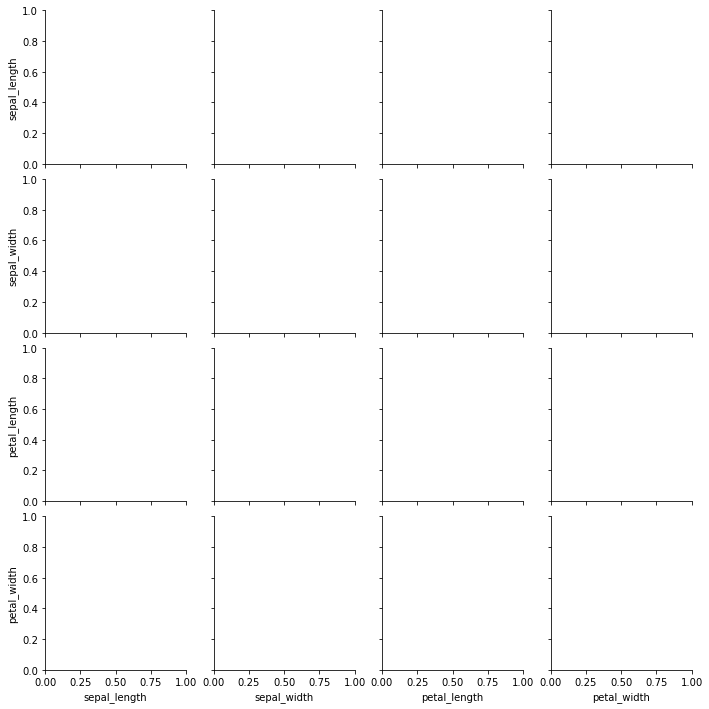

In [51]:
# Just the empty Grid
sbn.PairGrid(iris)

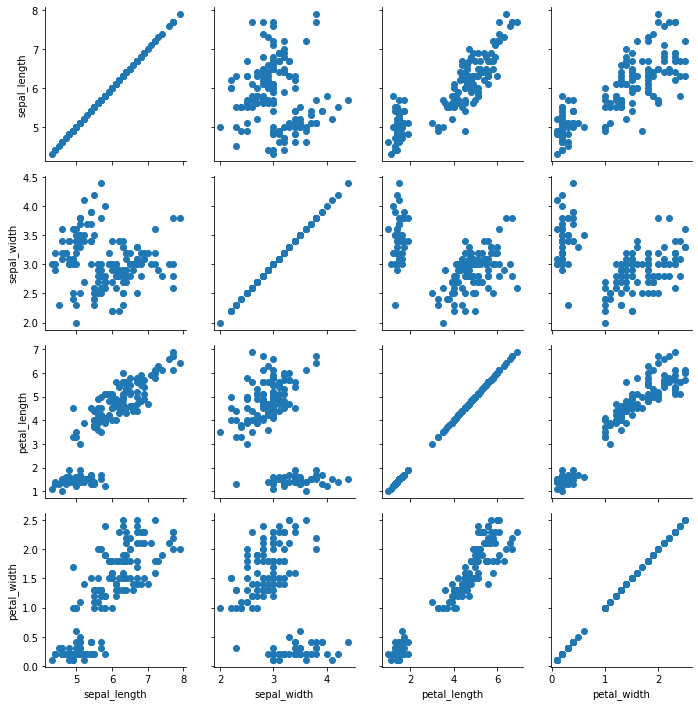

In [52]:
# Then you map to the grid
g = sbn.PairGrid(iris)
g.map(plt.scatter)

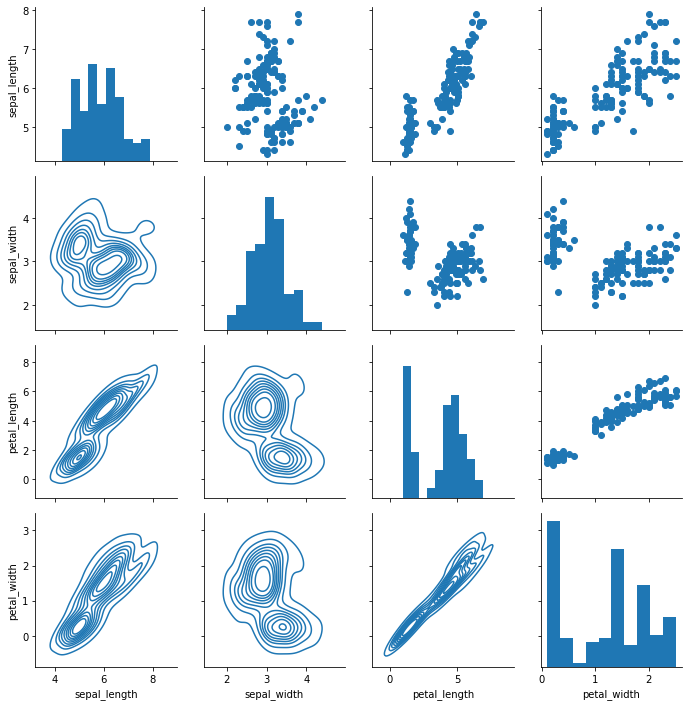

In [53]:
# Map to upper,lower, and diagonal
g = sbn.PairGrid(iris)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sbn.kdeplot)

## pairplot

pairplot is a simpler version of PairGrid (you'll use quite often)

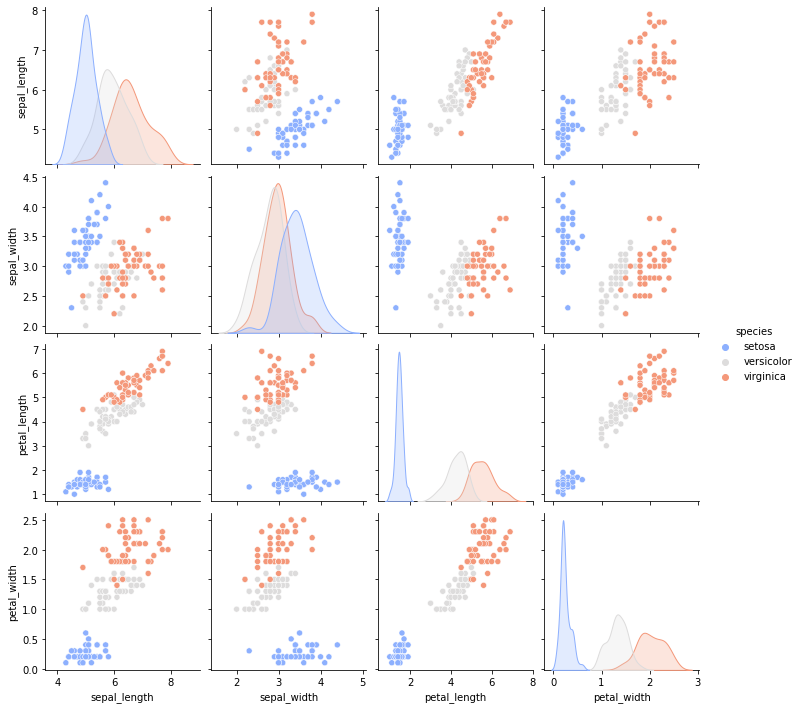

In [54]:
sbn.pairplot(iris,hue='species',palette='coolwarm')

### 2). Facet Grid

FacetGrid is the general way to create grids of plots based off of a feature:

In [55]:
tips = sbn.load_dataset('tips')

In [56]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


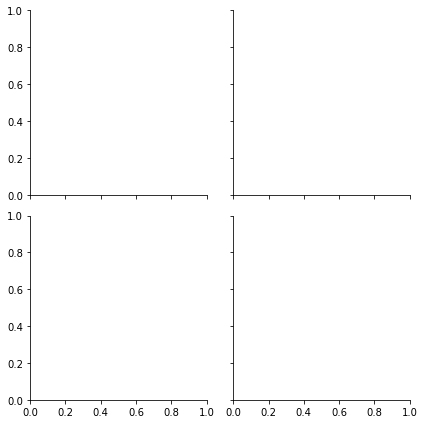

In [57]:
# Just the empty Grid
g = sbn.FacetGrid(tips, col="time", row="smoker")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


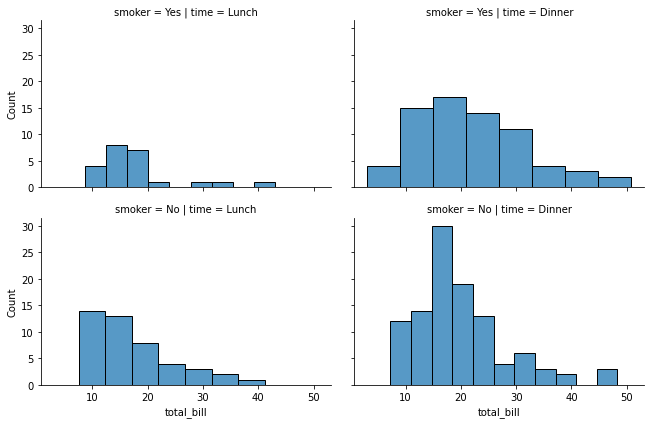

In [58]:
g = sbn.FacetGrid(tips, col="time",  row="smoker")
g = g.map(sbn.histplot, "total_bill").add_legend
#plt.tight_layout()
plt.subplots_adjust(right=1.5)
#plt.legend(bbox_to_anchor=(1.2,1.55),loc=8,borderaxespad=0)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be r

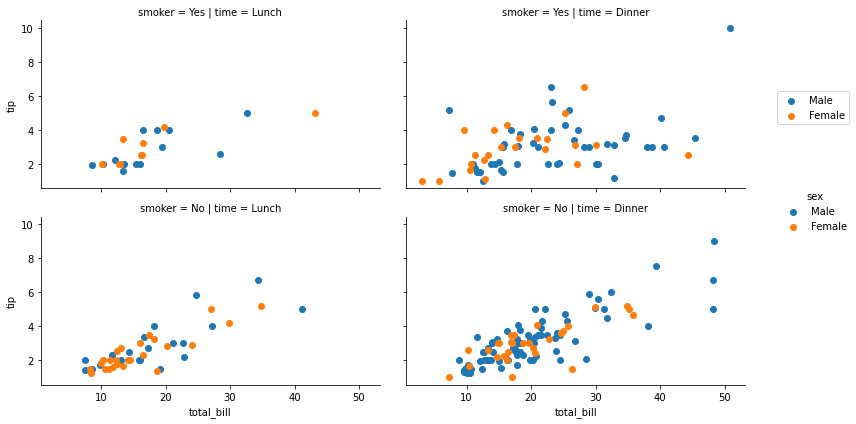

In [59]:
g = sbn.FacetGrid(tips, col="time", row="smoker",hue='sex')
# Notice how the arguments come after plt.scatter call
g = g.map(plt.scatter, "total_bill", "tip").add_legend()
plt.subplots_adjust(right=1.5)
plt.legend(bbox_to_anchor=(1.2,1.55),loc=8,borderaxespad=0)

### 3) JointGrid

JointGrid is the general version for jointplot() type grids, for a quick example:

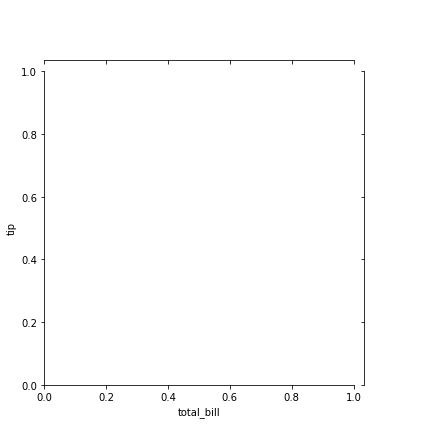

In [60]:
g = sbn.JointGrid(x="total_bill", y="tip", data=tips)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


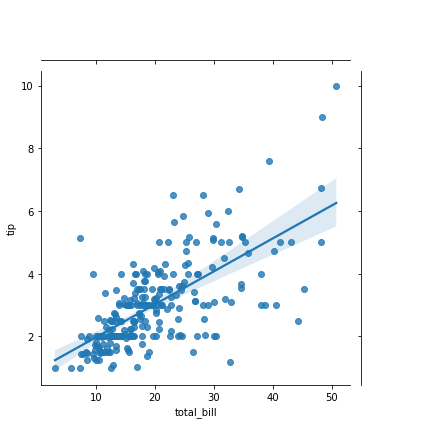

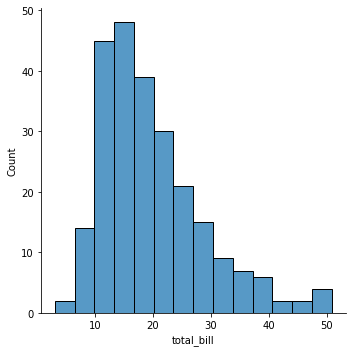

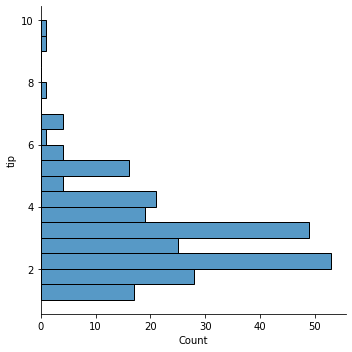

In [61]:
g = sbn.JointGrid(x="total_bill", y="tip", data=tips)
g = g.plot(sbn.regplot, sbn.displot)

***
## 6. Regression Plots

Seaborn has many built-in capabilities for regression plots, however we will only cover the **lmplot()** function for now.

**lmplot** allows you to display linear models, but it also conveniently allows you to split up those plots based off of features, as well as coloring the hue based off of features.

In [62]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


###  lmplot()

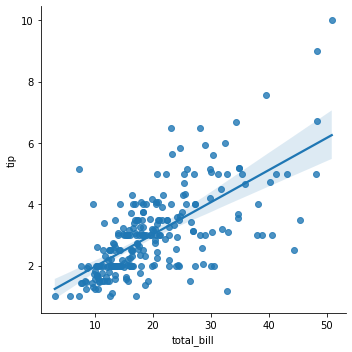

In [63]:
sbn.lmplot(x='total_bill',y='tip',data=tips)

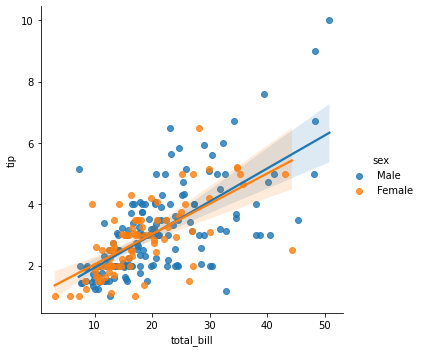

In [64]:
sbn.lmplot(x='total_bill',y='tip',data=tips,hue='sex')

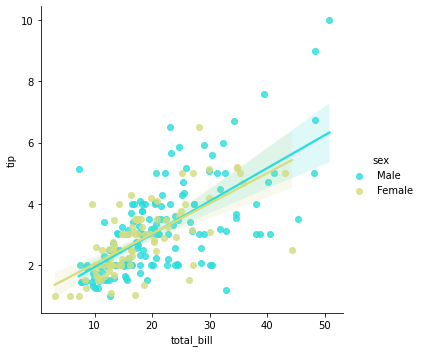

In [65]:
sbn.lmplot(x='total_bill',y='tip',data=tips,hue='sex',palette='rainbow') # coolwarm

### Working with Markers

lmplot get passed through to **regplot** which is a more general form of lmplot(). regplot has a scatter_kws parameter that gets passed to plt.scatter. So you want to set the s parameter in that dictionary, which corresponds (a bit confusingly) to the squared markersize. In other words you end up passing a dictionary with the base matplotlib arguments, in this case, s for size of a scatter plot. In general, you probably won't remember this off the top of your head, but instead reference the documentation.

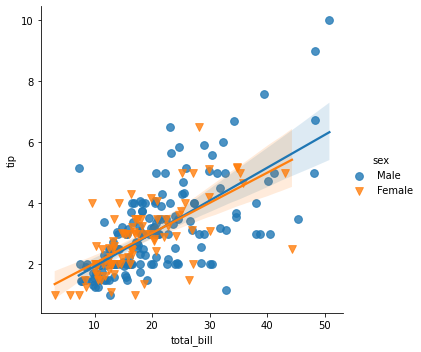

In [66]:
# http://matplotlib.org/api/markers_api.html
sbn.lmplot(x='total_bill',y='tip',data=tips,hue='sex',
           markers=['o','v'],scatter_kws={'s':60})  #'s' for size of scatter plot; can add palette='coolwarm'

### Using a Grid

We can add more variable separation through columns and rows with the use of a grid. Just indicate this with the col or row arguments:

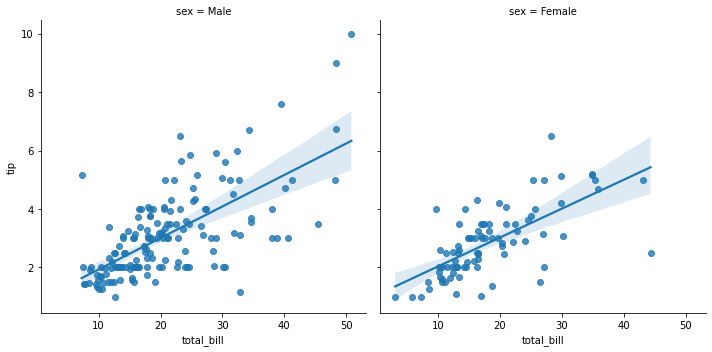

In [67]:
sbn.lmplot(x='total_bill',y='tip',data=tips,col='sex')  # separate the charts by column instead of by hue which is color

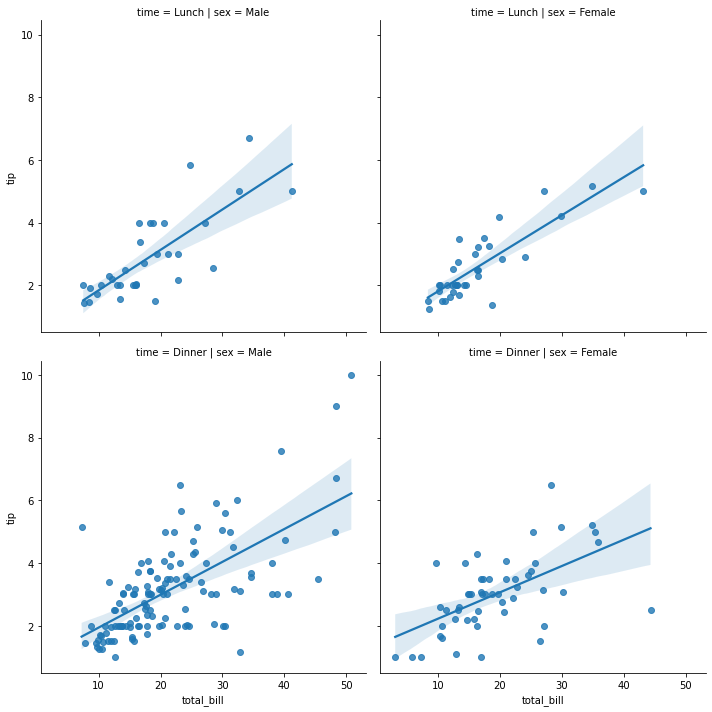

In [68]:
sbn.lmplot(x='total_bill',y='tip',data=tips,col='sex', row='time')

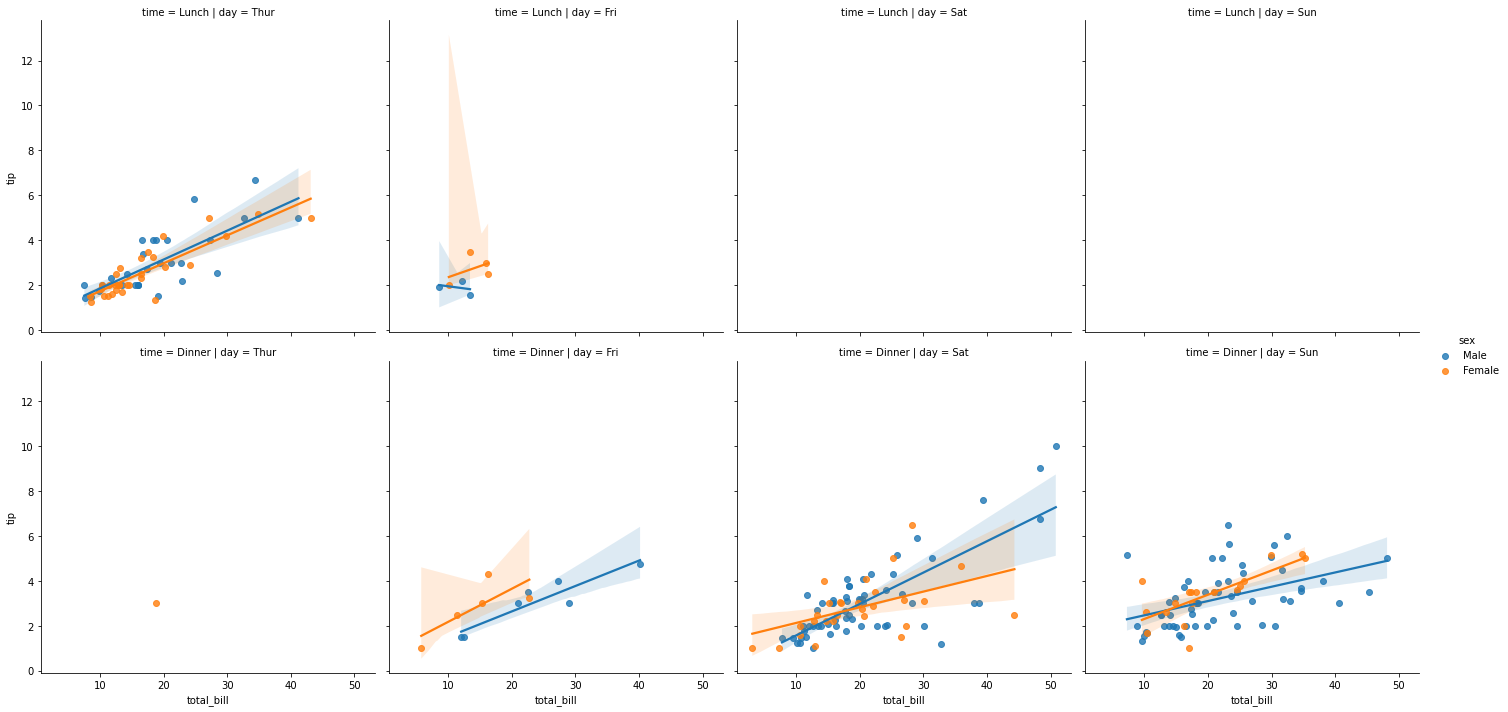

In [69]:
sbn.lmplot(x='total_bill',y='tip',data=tips,col='day', row='time', hue='sex')

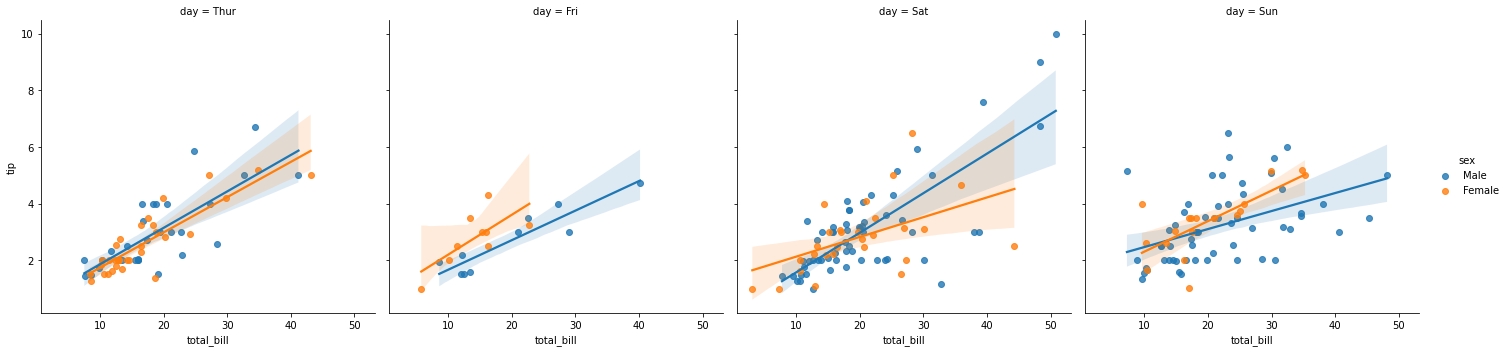

In [70]:
sbn.lmplot(x="total_bill", y="tip", col="day",hue='sex', data=tips)

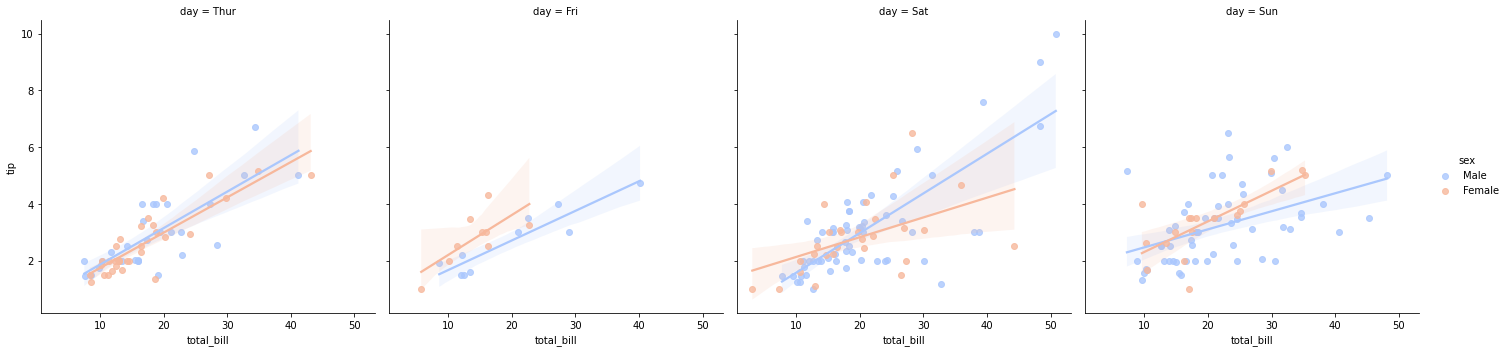

In [71]:
sbn.lmplot(x='total_bill',y='tip',data=tips,col='day',hue='sex',palette='coolwarm')

### Aspect and Size

Seaborn figures can have their size and aspect ratio adjusted with the **size** and **aspect** parameters:

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


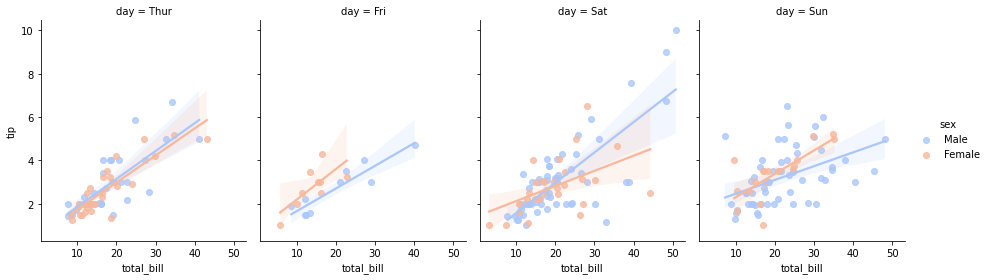

In [72]:
sbn.lmplot(x='total_bill',y='tip',data=tips,col='day',hue='sex',palette='coolwarm',
          aspect=0.8,height=7, size=4)  # aspect = width/height

***
## 7. Style and Color

We've shown a few times how to control figure aesthetics in seaborn, but let's now go over more details:

### Styles

You can set particular styles:

In [73]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:xlabel='sex', ylabel='count'>

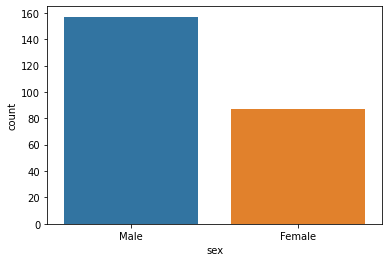

In [74]:
sbn.countplot(x='sex',data=tips)

<AxesSubplot:xlabel='sex', ylabel='count'>

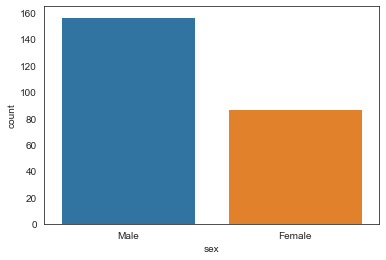

In [75]:
sbn.set_style('white')
sbn.countplot(x='sex',data=tips)

<AxesSubplot:xlabel='sex', ylabel='count'>

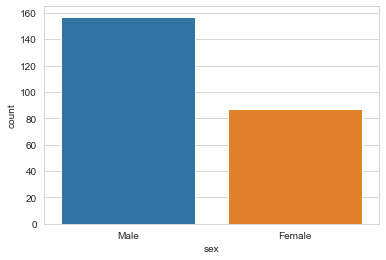

In [76]:
sbn.set_style('whitegrid')
sbn.countplot(x='sex',data=tips)

<AxesSubplot:xlabel='sex', ylabel='count'>

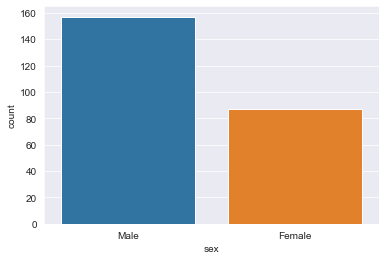

In [77]:
sbn.set_style('darkgrid')
sbn.countplot(x='sex',data=tips)

<AxesSubplot:xlabel='sex', ylabel='count'>

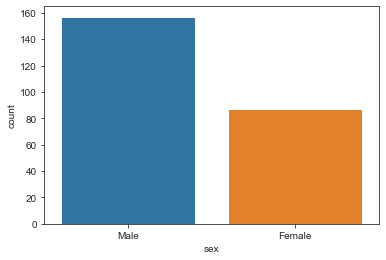

In [78]:
sbn.set_style('ticks')
sbn.countplot(x='sex',data=tips)

<AxesSubplot:xlabel='sex', ylabel='count'>

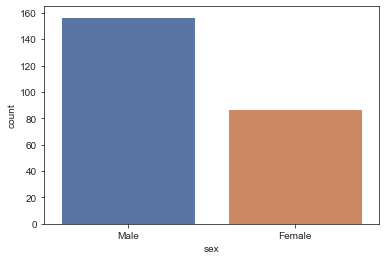

In [79]:
sbn.set_style('ticks')
sbn.countplot(x='sex',data=tips,palette='deep')

### Spine Removal

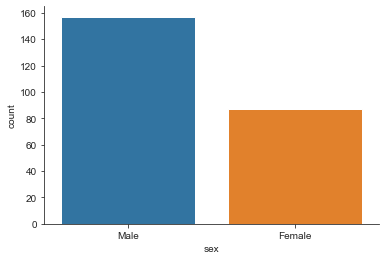

In [80]:
sbn.countplot(x='sex',data=tips)
sbn.despine()   # remove the top and right spines by default

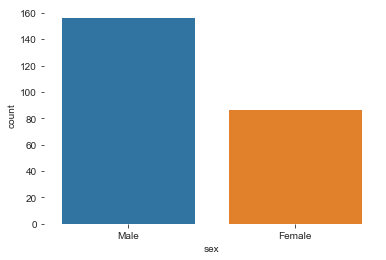

In [81]:
sbn.countplot(x='sex',data=tips)
sbn.despine(left=True, bottom=True)

### Size and Aspect

You can use matplotlib's `plt.figure(figsize=(width,height)`to change the size of most seaborn plots.

You can control the size and aspect ratio of most seaborn grid plots by passing in parameters: size, and aspect.

<AxesSubplot:xlabel='sex', ylabel='count'>

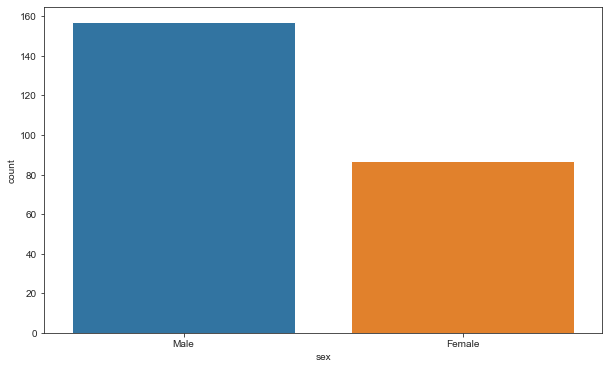

In [82]:
# Non Grid Plot
plt.figure(figsize=(10,6))  # Matplotlib set the figure size of seaborn plot
sbn.countplot(x='sex',data=tips)

<AxesSubplot:xlabel='sex', ylabel='count'>

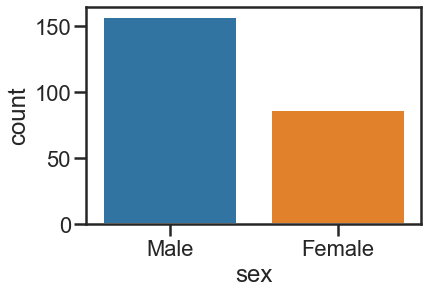

In [83]:
sbn.set_context('poster',font_scale=1)  # Matplotlib set the figure size of seaborn plot
sbn.countplot(x='sex',data=tips)

<AxesSubplot:xlabel='sex', ylabel='count'>

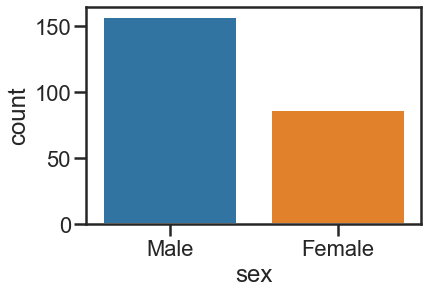

In [84]:
sbn.set_context('poster')
sbn.countplot(x='sex',data=tips)

<AxesSubplot:xlabel='sex', ylabel='count'>

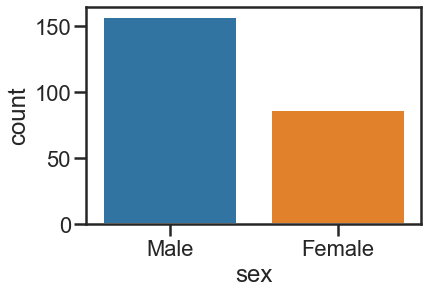

In [85]:
sbn.set_context('poster',font_scale=1)
sbn.countplot(x='sex',data=tips)

<AxesSubplot:xlabel='sex', ylabel='count'>

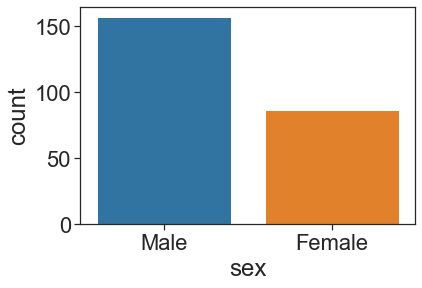

In [86]:
sbn.set_context('notebook',font_scale=2)
sbn.countplot(x='sex',data=tips)

### Style and Color

- Check out this link: https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

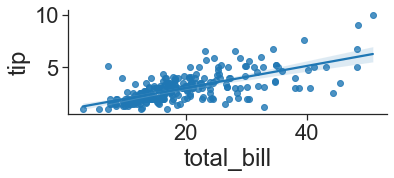

In [87]:
# Grid Type Plot
sbn.lmplot(x='total_bill',y='tip',height=3,aspect=2,data=tips) 
# Height (in inches) of each facet. See also: ``aspect``.    
# aspect : scalar, optional
# Aspect ratio of each facet, so that ``aspect * height`` gives the width of each facet in inches. 

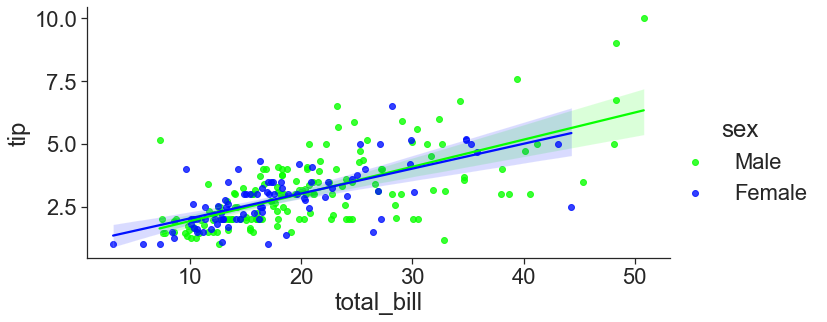

In [88]:
# Grid Type Plot
sbn.lmplot(x='total_bill',y='tip',height=5,aspect=2,data=tips, hue='sex', palette = 'hsv') # plasma, hsv, seismic
# Height (in inches) of each facet. See also: ``aspect``.    
# aspect : scalar, optional
# Aspect ratio of each facet, so that ``aspect * height`` gives the width of each facet in inches. 

#### The course materials are developed mainly based on my personal experience and contributions from the Python learning community. 

Referred Books: 
- Learning Python, 5th Edition by Mark Lutz
- Python Data Science Handbook, Jake, VanderPlas
- Python for Data Analysis, Wes McKinney 

Copyright ©2022 Mei Najim. All rights reserved.   